In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Upload the dataset

In [2]:
df=pd.read_csv("flipdata.csv.csv")

In [3]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


## Convert prize column datatype to float as it contain commas

In [5]:
df['Prize'] = df['Prize'].str.replace(',', '').astype(float)

In [6]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

## From column rare camera and front camera remove MP and convert it to integer

In [7]:
df["Front Camera"] = df["Front Camera"].str.replace("MP", "").astype(int)

In [8]:
df["Rear Camera"] = df["Rear Camera"].str.replace("MP", "").astype(int)

In [9]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [10]:
df.nunique()

Unnamed: 0       541
Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
max_value=df["Prize"].max()
min_value=df["Prize"].min()
print("Maximum value of the phone :",max_value)
print("Minimum value of the phone:",min_value)

Maximum value of the phone : 80999.0
Minimum value of the phone: 920.0


## from above we can tell that
## maximum value of the phone is 80999
## minimum value of the phone is 920

# Univarient anlysis

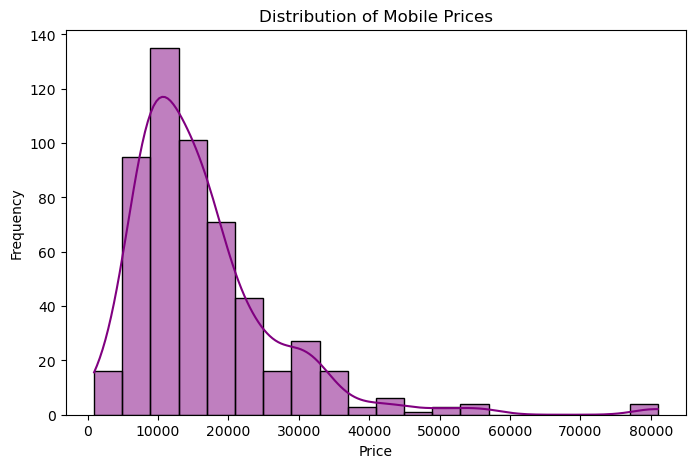

In [13]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["Prize"], bins=20, kde=True, color='purple')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Mobile Prices")
plt.show()


### above histogram shows 
### most common price range-rs 10,000 to rs 15,000
### it is skewed to the right side (positively skewed)most of phone are priced in the lower range.
### few phone are above 25,000 andeven around 80,000

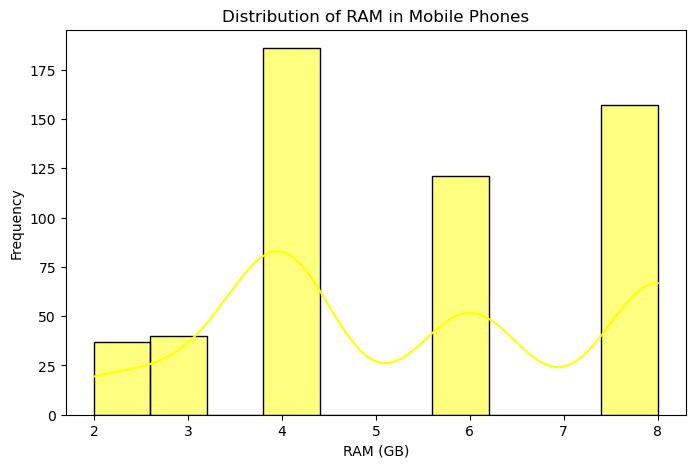

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["RAM"], bins=10, kde=True, color='yellow')
plt.xlabel("RAM (GB)")
plt.ylabel("Frequency")
plt.title("Distribution of RAM in Mobile Phones")
plt.show()

### 4GB RAM is most frequent likely standard configuration for many budget and mid range phone.
### 8 GB RAM and 6 GB RAM show high frequencies (common in mid range to premium segement phone).
### 2 GB AND 3GB are less frequent (low end phones)
### this is multimodal distribution-multiple peaks(4GB,6GB and 8 GB)
### Could indicate different market segements budget(2-4 GB),Mid range(6GB) AND PREMIUM (8GB+)

## BI VARIANT ANALYSIS

### Price vs RAM

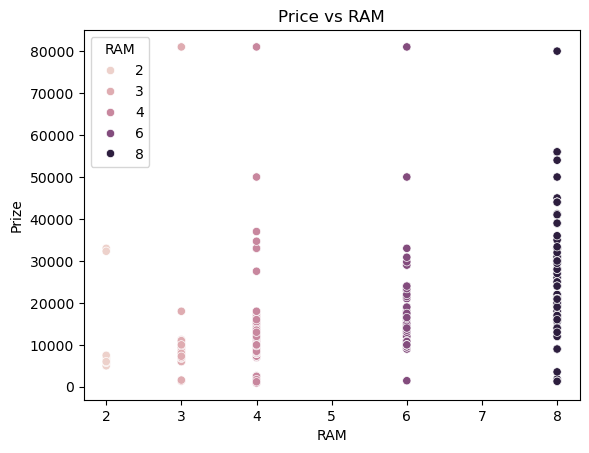

In [15]:
sns.scatterplot(data=df, x='RAM', y='Prize', hue='RAM')
plt.title('Price vs RAM')
plt.show()

### Many 4 GB and 6 GB RAM devices are priced similar to or even higher than 8 GB devices.
### 8 GB RAM category spans from very low prices (~₹2,000–₹5,000) all the way to ₹80,000+.
### This indicates significant diversity in pricing within the 8 GB group—likely due to other features or mislabelled data.
### 2 GB and 3 GB RAM devices also appear at very high prices (~₹80,000), which is unexpected.
### This may suggest:
###  *Outliers
###  *Data entry errors
###  *Niche/luxury products with outdated specs




# MULTIVARIENT ANALYSIS 

In [16]:
numeric_df=df.select_dtypes(include=["number"])

In [17]:
correlation_matrix=numeric_df.corr()

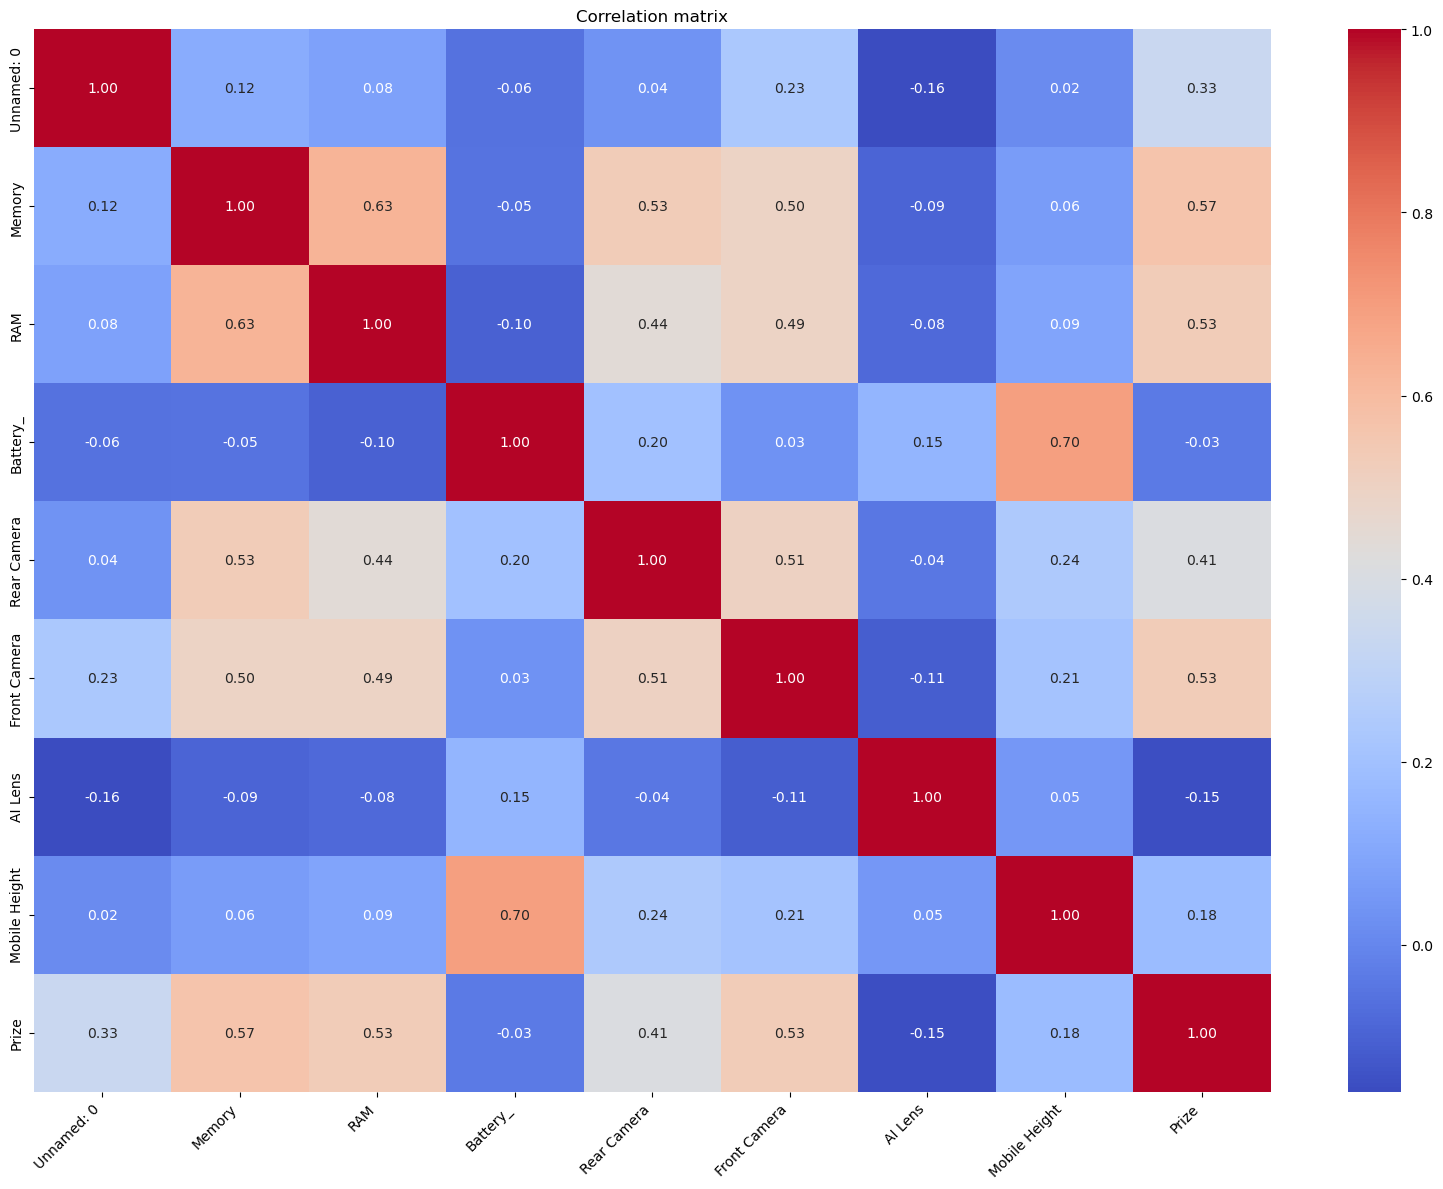

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation matrix")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

### *Highly corelated columns with prize are - Memory,RAM, Rear Camera, Front Camera,Rear camera (slightly corelated)
### *Memory is corelated to prize, rear camera,front camera and RAM
### *RAM is corelated to memory,prize,rear camera and front camera
### *Battery is higly corelated to mobile height
### *Rear camera is sligltly corelated toprize showing that rear camera doest play much role in price determination as 
###  compared to front camera which is corelated more, also it is corelated to front camera,memory amd RAM
### *Front camera is corelated to price,rare camera,memory and RAM
### *Mobile height is highly corelated to Battery showing that more the power of battery more big will be the mobile as larger display 
###  needs more energy

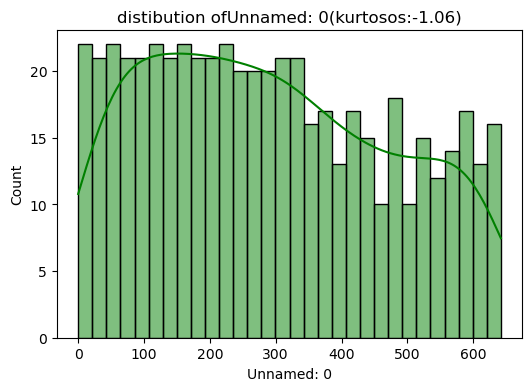

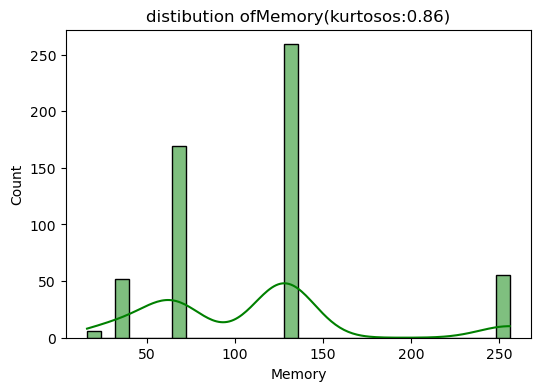

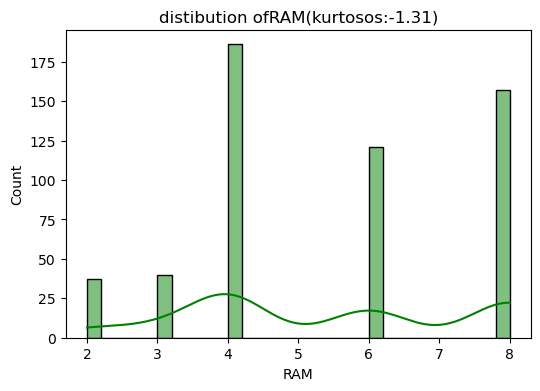

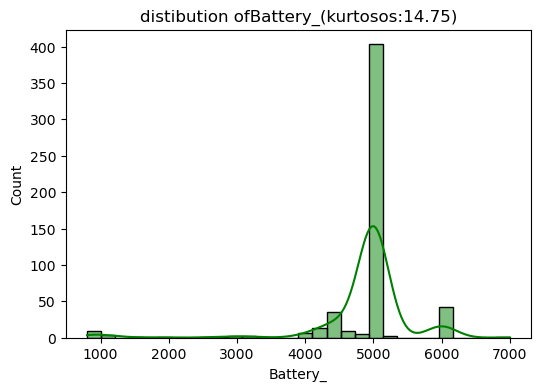

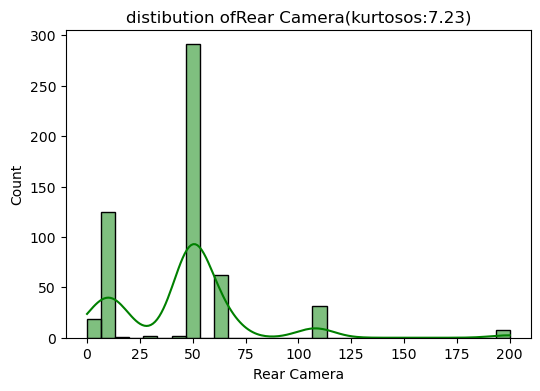

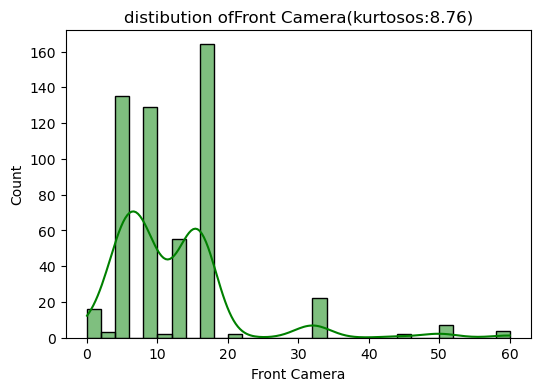

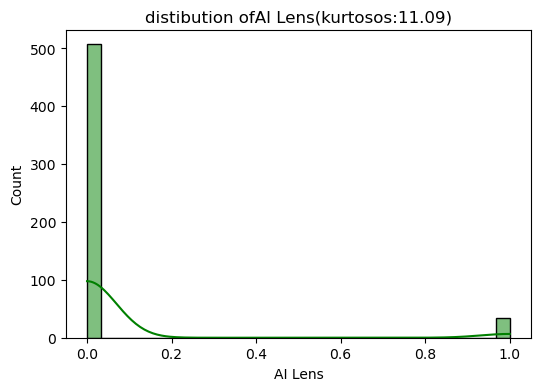

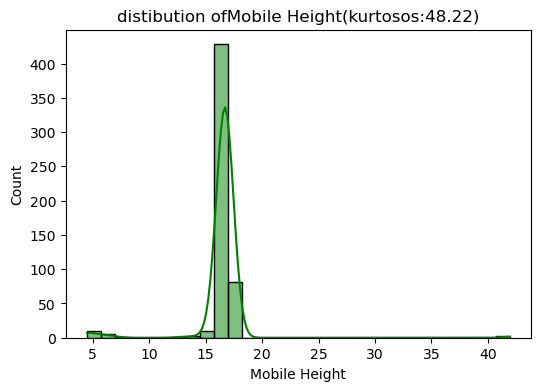

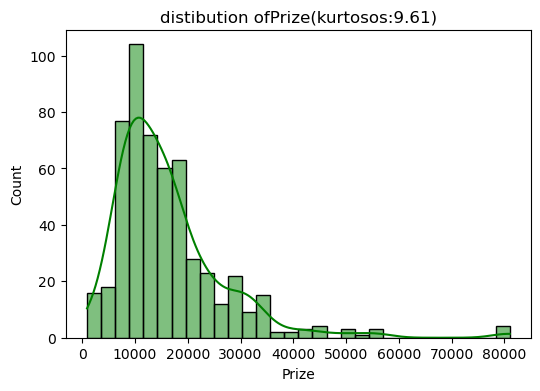

In [19]:
for col in numeric_df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numeric_df[col],kde=True,bins=30,color="green")
    plt.title(f"distibution of{col}(kurtosos:{numeric_df[col].kurt():.2f})")
    plt.show()

### most of the columns have high kurtosis 
### *prize column is having one high peak around mean and heavy tail indicating many outliers esp high price values. 
### very sharp peak of mobile height column ,data is highly concentrated around mean.


In [20]:
numerical_cols=df.select_dtypes(include=[np.number])
Q1=numerical_cols.quantile(0.25)
Q3=numerical_cols.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=(numerical_cols<lower_bound)|(numerical_cols>upper_bound)
outliers_value=numerical_cols[outliers]
print(outliers_value.stack())
outlier_counts=outliers.sum()
print(outlier_counts)

0    Battery_          6000.00
     AI Lens              1.00
1    Battery_          6000.00
     AI Lens              1.00
4    AI Lens              1.00
                        ...   
536  Mobile Height       15.49
     Prize            79999.00
537  Battery_          3100.00
     Mobile Height       12.70
539  Prize            38999.00
Length: 351, dtype: float64
Unnamed: 0         0
Memory            55
RAM                0
Battery_         152
Rear Camera       39
Front Camera      13
AI Lens           34
Mobile Height     33
Prize             25
dtype: int64


## From above we can see that following columns have outliers
## Memory=55, Battery=152, Rear camera=39, Front Camera=13, AI LENSE=34, Mobile Height=33
## Prize=25

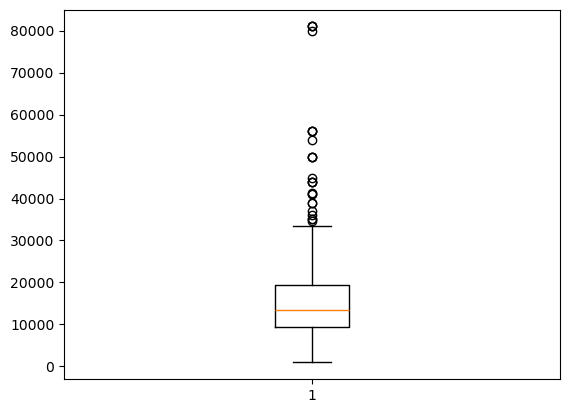

In [21]:
plt.boxplot(df['Prize'])
plt.show()

## Middle price point is around 10,000 to 15,000 mostly phone fall under this range as it is where median lies
## price above 30,000 are outliers and few are around 80,000 (premium smartphones)

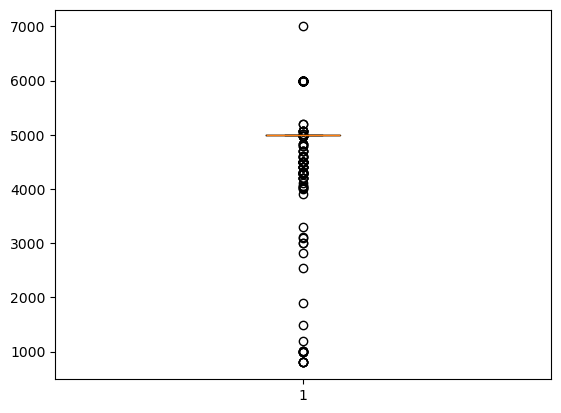

In [22]:
plt.boxplot(df['Battery_'])
plt.show()

### Mostly battery capacity is centerd at 5000 mah(standard battery for many phones as median lies there)
### Phone with battery below 3500 mah appaer as outliers
### few exceed 6000 to 7000.

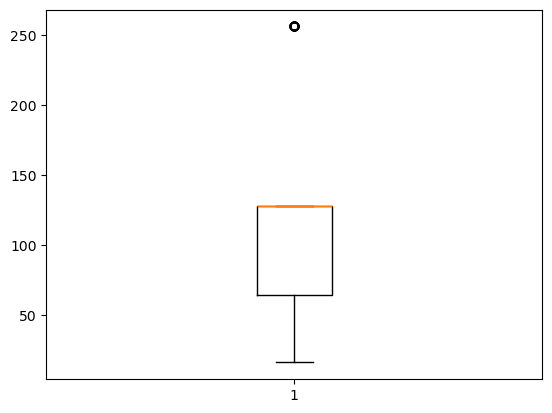

In [23]:
plt.boxplot(df['Memory'])
plt.show()

### Most phones have memory between 50 and 130 units.
### there is single high end outlier around 256.

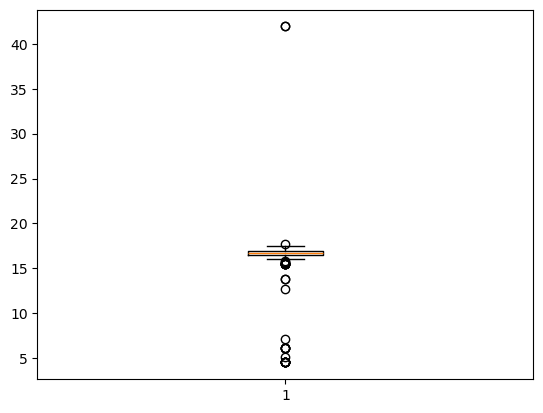

In [24]:
plt.boxplot(df['Mobile Height'])
plt.show()

### phones with height around 4.5 to 7cm are extremely small campared to standard smartphones.
### 41.94 is extremely high -could be data entry error or could represent large tablet.

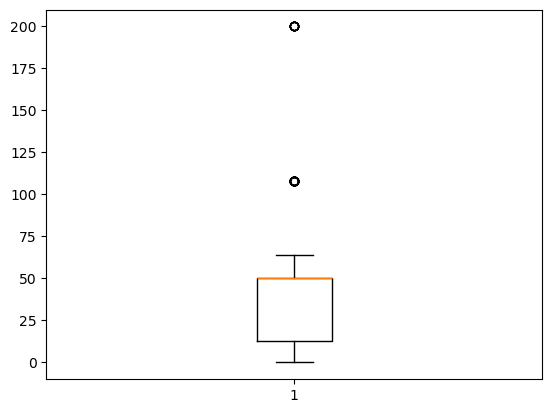

In [25]:
plt.boxplot(df['Rear Camera'])
plt.show()

## mostly phone have 10 to 50 mp rear camera rare cameras vary significantly between models.
## outlier at 120 and 200 mp
## lower whisker close to 8mp (basic or older smartphone)

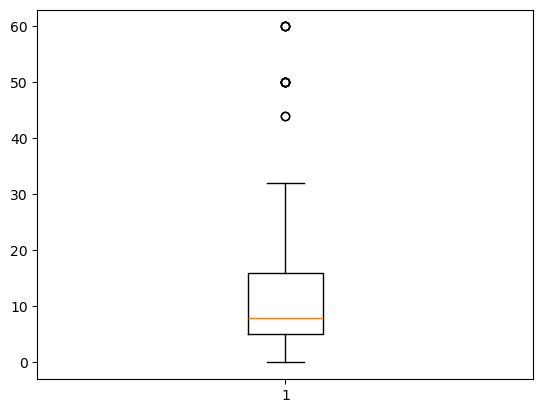

In [26]:
plt.boxplot(df['Front Camera'])
plt.show()

In [27]:
df["Memory"].describe()

count    541.000000
mean     110.550832
std       60.600694
min       16.000000
25%       64.000000
50%      128.000000
75%      128.000000
max      256.000000
Name: Memory, dtype: float64

## Handling Outliers one by one

In [28]:
Q1=64.0
Q3=128.0

In [29]:
upper_limit1=Q3+1.5*(Q3-Q1)
lower_limit1=Q3-1.5*(Q3-Q1)

In [30]:
upper_limit1

224.0

In [31]:
lower_limit1

32.0

In [32]:
df['Memory']= np.where(df['Memory']>upper_limit1,df['Memory'].median(),df['Memory'])

In [33]:
df["Battery_"].describe()

count     541.000000
mean     4871.587800
std       780.148862
min       800.000000
25%      5000.000000
50%      5000.000000
75%      5000.000000
max      7000.000000
Name: Battery_, dtype: float64

In [34]:
Q1=5000
Q3=5000

In [35]:
upper_limit2=Q3+1.5*(Q3-Q1)
lower_limit2=Q3-1.5*(Q3-Q1)

In [36]:
upper_limit2

5000.0

In [37]:
lower_limit2

5000.0

In [38]:
df['Battery_']= np.where(df['Battery_']>upper_limit2,df['Battery_'].median(),df['Battery_'])

In [39]:
df['Battery_']= np.where(df['Battery_']<lower_limit2,df['Battery_'].mean(),df['Battery_'])

In [40]:
df["Rear Camera"].describe()

count    541.000000
mean      46.110906
std       31.260416
min        0.000000
25%       13.000000
50%       50.000000
75%       50.000000
max      200.000000
Name: Rear Camera, dtype: float64

In [41]:
Q1=13.0
Q3=50.0

In [42]:
upper_limit3=Q3+1.5*(Q3-Q1)
lower_limit3=Q3-1.5*(Q3-Q1)

In [43]:
upper_limit3

105.5

In [44]:
lower_limit3

-5.5

In [45]:
df['Rear Camera']= np.where(df['Rear Camera']>upper_limit3,df['Rear Camera'].median(),df['Rear Camera'])

In [46]:
df['Rear Camera']= np.where(df['Rear Camera']<lower_limit3,df['Rear Camera'].mean(),df['Rear Camera'])

In [47]:
df["Front Camera"].describe()

count    541.000000
mean      11.992606
std        9.053746
min        0.000000
25%        5.000000
50%        8.000000
75%       16.000000
max       60.000000
Name: Front Camera, dtype: float64

In [48]:
Q1=5.00
Q3=16.0

In [49]:
upper_limit4=Q3+1.5*(Q3-Q1)
lower_limit4=Q3-1.5*(Q3-Q1)

In [50]:
upper_limit4

32.5

In [51]:
lower_limit4

-0.5

In [52]:
df['Front Camera']= np.where(df['Front Camera']>upper_limit4,df['Front Camera'].median(),df['Front Camera'])

In [53]:
df['Front Camera']= np.where(df['Front Camera']<lower_limit3,df['Front Camera'].mean(),df['Front Camera'])

## as AI Lens doesnt seem to be important column also it is in binary format so we can drop this column

In [54]:
df = df.drop(columns=['AI Lens'])

In [55]:
df["Mobile Height"].describe()

count    541.000000
mean      16.431201
std        2.523553
min        4.500000
25%       16.510000
50%       16.710000
75%       16.940000
max       41.940000
Name: Mobile Height, dtype: float64

In [56]:
Q1=16.51
Q3=16.94

In [57]:
upper_limit5=Q3+1.5*(Q3-Q1)
lower_limit5=Q3-1.5*(Q3-Q1)

In [58]:
upper_limit5

17.585

In [59]:
lower_limit5

16.295

In [60]:
df['Mobile Height']= np.where(df['Mobile Height']>upper_limit5,df['Mobile Height'].median(),df['Mobile Height'])

In [61]:
df['Mobile Height']= np.where(df['Mobile Height']<lower_limit5,df['Mobile Height'].mean(),df['Mobile Height'])

In [62]:
df["Prize"].describe()

count      541.000000
mean     16228.375231
std      10793.588322
min        920.000000
25%       9290.000000
50%      13499.000000
75%      19280.000000
max      80999.000000
Name: Prize, dtype: float64

In [63]:
Q1=9290
Q3=19280

In [64]:
upper_limit6=Q3+1.5*(Q3-Q1)
lower_limit6=Q3-1.5*(Q3-Q1)

In [65]:
upper_limit6

34265.0

In [66]:
lower_limit6

4295.0

In [67]:
df['Prize']= np.where(df['Prize']>upper_limit6,df['Prize'].mode(),df['Prize'])

### Dropping the unnamed column as it is of no use


In [68]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [69]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,16.64,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,16.56,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,16.76,G37,8999.0


In [70]:
def categorize_Front_Camera(mp):
    if mp >= 16:
        return 'High'
    elif mp >= 8:
        return 'Average'
    else:
        return 'Low'

df['Front Camera Quality'] = df['Front Camera'].apply(categorize_Front_Camera)


In [71]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Front Camera Quality
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,16.64,Qualcomm Snapdragon 680,11999.0,High
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,16.56,Mediatek Helio A22,5649.0,Low
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,16.76,G37,8999.0,Low


In [72]:
def categorize_Front_Camera(mp):
    if mp >= 16:
        return 'High'
    elif mp >= 8:
        return 'Average'
    else:
        return 'Low'

df['Rear Camera Quality'] = df['Rear Camera'].apply(categorize_Front_Camera)

In [73]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Front Camera Quality,Rear Camera Quality
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,16.64,Qualcomm Snapdragon 680,11999.0,High,High
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,16.56,Mediatek Helio A22,5649.0,Low,Average
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,16.76,G37,8999.0,Low,High


In [74]:
df["Colour"].nunique()

275

In [75]:
df['Colour'].value_counts()

Colour
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: count, Length: 275, dtype: int64

In [76]:
df[['Model', 'Colour']]

,Model,Colour
0,Infinix SMART 7,Night Black
1,Infinix SMART 7,Azure Blue
2,MOTOROLA G32,Mineral Gray
3,POCO C50,Royal Blue
4,Infinix HOT 30i,Marigold
...,...,...
536,SAMSUNG Galaxy S23 5G,Cream
537,LAVA Z21,Cyan
538,Tecno Spark 8T,Turquoise Cyan
539,SAMSUNG Galaxy A54 5G,Awesome Lime


## Create new column from color taking base colors to understand it better

In [77]:
df['Base_Color'] = df['Colour'].str.split().str[-1]

In [78]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Front Camera Quality,Rear Camera Quality,Base_Color
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average,Black
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average,Blue
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,16.64,Qualcomm Snapdragon 680,11999.0,High,High,Gray
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,16.56,Mediatek Helio A22,5649.0,Low,Average,Blue
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,16.76,G37,8999.0,Low,High,Marigold


### We can create new column from column name Model to Brand as model discription have long color names

In [79]:
df['Brand'] = df['Model'].str.split().str[0]

In [80]:
df['Brand'].value_counts()

Brand
realme       98
REDMI        68
Infinix      65
vivo         62
POCO         60
SAMSUNG      55
MOTOROLA     46
Tecno        17
OPPO         16
Google        9
micromax      9
redmi         5
OnePlus       5
APPLE         5
Micromax      4
itel          3
Nokia         3
nothing       2
I             2
IQOO          2
Redmi         2
LAVA          2
micromax1     1
Name: count, dtype: int64

### After applying value counts its clearly visible micromax iswritten in three differnt ways so will prefer to make it one

In [81]:
df['Brand'] = df['Brand'].str.lower()  # Make all lowercase
df['Brand'] = df['Brand'].str.replace('micromax1', 'micromax')  # Replace specific variation

In [82]:
df['Brand'].value_counts()

Brand
realme      98
redmi       75
infinix     65
vivo        62
poco        60
samsung     55
motorola    46
tecno       17
oppo        16
micromax    14
google       9
oneplus      5
apple        5
itel         3
nokia        3
nothing      2
i            2
iqoo         2
lava         2
Name: count, dtype: int64

In [83]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Front Camera Quality,Rear Camera Quality,Base_Color,Brand
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average,Black,infinix
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average,Blue,infinix
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,16.64,Qualcomm Snapdragon 680,11999.0,High,High,Gray,motorola
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,16.56,Mediatek Helio A22,5649.0,Low,Average,Blue,poco
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,16.76,G37,8999.0,Low,High,Marigold,infinix


### Now we will extract a new column from Processor_ to processor brand grouping it with Model as some processors company name not shown

In [84]:
processor_brand_mapping = df.groupby('Processor_')['Brand'].agg(lambda x: x.mode()[0]).to_dict()

In [85]:
df['Processor Brand'] = df['Processor_'].map(processor_brand_mapping)

In [86]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Front Camera Quality,Rear Camera Quality,Base_Color,Brand,Processor Brand
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average,Black,infinix,infinix
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Low,Average,Blue,infinix,infinix
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,16.64,Qualcomm Snapdragon 680,11999.0,High,High,Gray,motorola,motorola
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,16.56,Mediatek Helio A22,5649.0,Low,Average,Blue,poco,infinix
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,16.76,G37,8999.0,Low,High,Marigold,infinix,infinix


### As we have exracted quite useful new columns from existing columns ,so we can drop few columns for further analysis

In [87]:
df.drop(columns=['Processor_'], inplace=True)

In [88]:
df.drop(columns=['Model'], inplace=True)

In [89]:
df.drop(columns=['Colour'], inplace=True)

In [90]:
df.head()

,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Prize,Front Camera Quality,Rear Camera Quality,Base_Color,Brand,Processor Brand
0,64.0,4,5000.0,13.0,5.0,16.76,7299.0,Low,Average,Black,infinix,infinix
1,64.0,4,5000.0,13.0,5.0,16.76,7299.0,Low,Average,Blue,infinix,infinix
2,128.0,8,5000.0,50.0,16.0,16.64,11999.0,High,High,Gray,motorola,motorola
3,32.0,2,5000.0,8.0,5.0,16.56,5649.0,Low,Average,Blue,poco,infinix
4,128.0,8,5000.0,50.0,5.0,16.76,8999.0,Low,High,Marigold,infinix,infinix


### Instead of having two columns for camera quality we can combine them to make another column for overall camera quality

In [91]:
df['Overall Camera Quality'] = df['Rear Camera'] + df['Front Camera']

In [92]:
df.head()

,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Prize,Front Camera Quality,Rear Camera Quality,Base_Color,Brand,Processor Brand,Overall Camera Quality
0,64.0,4,5000.0,13.0,5.0,16.76,7299.0,Low,Average,Black,infinix,infinix,18.0
1,64.0,4,5000.0,13.0,5.0,16.76,7299.0,Low,Average,Blue,infinix,infinix,18.0
2,128.0,8,5000.0,50.0,16.0,16.64,11999.0,High,High,Gray,motorola,motorola,66.0
3,32.0,2,5000.0,8.0,5.0,16.56,5649.0,Low,Average,Blue,poco,infinix,13.0
4,128.0,8,5000.0,50.0,5.0,16.76,8999.0,Low,High,Marigold,infinix,infinix,55.0


In [93]:
df.drop(columns=['Front Camera Quality'], inplace=True)

In [94]:
df.drop(columns=['Rear Camera Quality'], inplace=True)

In [95]:
def categorize_camera(q):
    if q >= 48:
        return 'High'
    elif q >= 12:
        return 'Medium'
    else:
        return 'Low'

df['Camera_Category'] = df['Overall Camera Quality'].apply(categorize_camera)

In [96]:
df.drop(columns=['Overall Camera Quality'], inplace=True)

In [97]:
df.head()

,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Prize,Base_Color,Brand,Processor Brand,Camera_Category
0,64.0,4,5000.0,13.0,5.0,16.76,7299.0,Black,infinix,infinix,Medium
1,64.0,4,5000.0,13.0,5.0,16.76,7299.0,Blue,infinix,infinix,Medium
2,128.0,8,5000.0,50.0,16.0,16.64,11999.0,Gray,motorola,motorola,High
3,32.0,2,5000.0,8.0,5.0,16.56,5649.0,Blue,poco,infinix,Medium
4,128.0,8,5000.0,50.0,5.0,16.76,8999.0,Marigold,infinix,infinix,High


### As we have created new column from column names (front camera and rear camera) named overall camera quality so we can drop these two

In [98]:
df.drop(columns=['Rear Camera'], inplace=True)

In [99]:
df.drop(columns=['Front Camera'], inplace=True)

### As prize is our target column so we can move it to extreme right for training and 

In [100]:
columns = [col for col in df.columns if col != 'Prize'] + ['Prize']
df = df[columns]
df.to_csv("updated_flipdata.csv", index=False)

In [101]:
df.head()

,Memory,RAM,Battery_,Mobile Height,Base_Color,Brand,Processor Brand,Camera_Category,Prize
0,64.0,4,5000.0,16.76,Black,infinix,infinix,Medium,7299.0
1,64.0,4,5000.0,16.76,Blue,infinix,infinix,Medium,7299.0
2,128.0,8,5000.0,16.64,Gray,motorola,motorola,High,11999.0
3,32.0,2,5000.0,16.56,Blue,poco,infinix,Medium,5649.0
4,128.0,8,5000.0,16.76,Marigold,infinix,infinix,High,8999.0


# Further analysis after feature exatraction

In [102]:
df_cleaned = df[~df.isin(['nothing']).any(axis=1)]

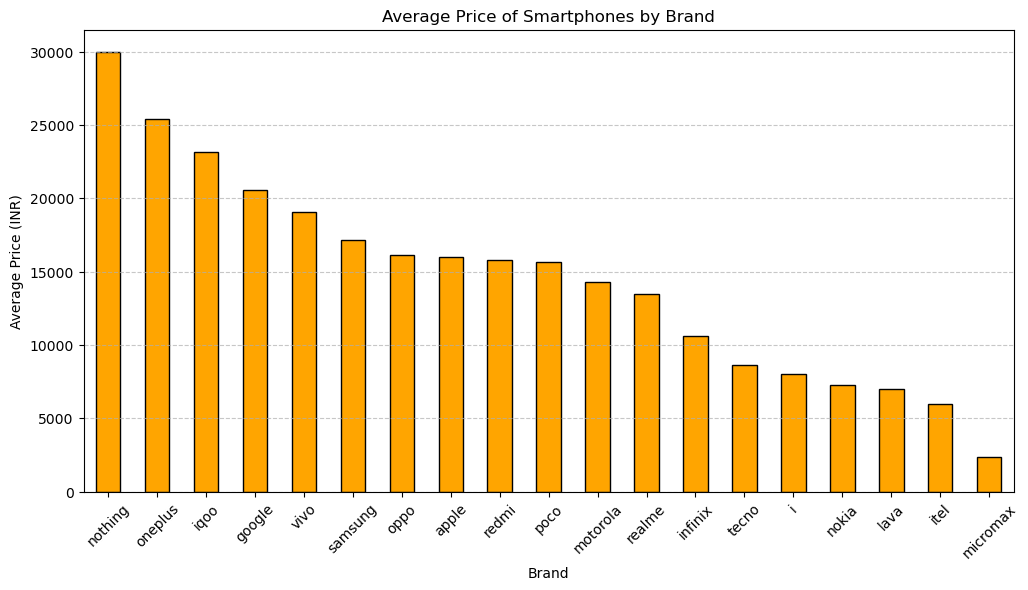

In [103]:
brand_avg_price = df.groupby('Brand')['Prize'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
brand_avg_price.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Average Price of Smartphones by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Most expensive brands-Oneplus,iQoo,Google with average price 20,000-26,000.
### Mid range Brands-Vivo,Samsung,Oppo,Apple,Redmi and Poco falls in 15,000-20,000 range but surprisingly apple is in mid range 
### coluld be due to mix of older i phone or region specific pricing.
### Budget brands-Motorola,Realme,Infinix,Techno.L,Nokia and Lava show average price in the 8,000-14,000
### itel and Micromax are the cheapest with micromax averaging under 5,000.
### Nothing may be due to data entry errors

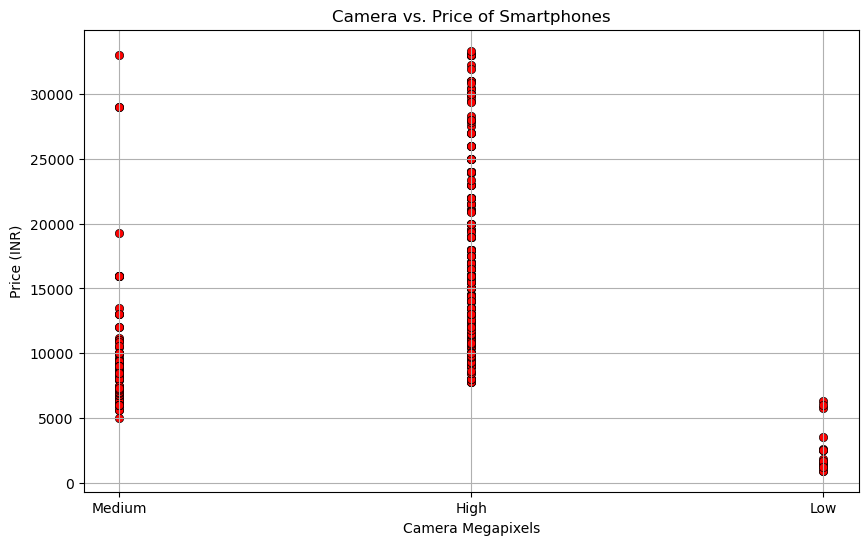

In [104]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Camera_Category'], y=df['Prize'], color='red', edgecolor='black')
plt.title("Camera vs. Price of Smartphones")
plt.xlabel("Camera Megapixels")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [105]:
df.head()

,Memory,RAM,Battery_,Mobile Height,Base_Color,Brand,Processor Brand,Camera_Category,Prize
0,64.0,4,5000.0,16.76,Black,infinix,infinix,Medium,7299.0
1,64.0,4,5000.0,16.76,Blue,infinix,infinix,Medium,7299.0
2,128.0,8,5000.0,16.64,Gray,motorola,motorola,High,11999.0
3,32.0,2,5000.0,16.56,Blue,poco,infinix,Medium,5649.0
4,128.0,8,5000.0,16.76,Marigold,infinix,infinix,High,8999.0


### Observations:
### High Camera Megapixels:
### These smartphones tend to have higher prices.
### Prices vary widely but generally range from around ₹8,000 to over ₹30,000.
### There is a dense cluster of phones between ₹10,000 and ₹25,000.
### Medium Camera Megapixels:
### These show a moderate price range.
### Most phones are priced between ₹5,000 and ₹15,000, with some going above ₹30,000.
### Low Camera Megapixels:
### These are consistently lower priced.
### Most prices are under ₹7,000.
### Conclusion:
### There’s a visible correlation: higher camera megapixels often correspond to higher smartphone prices, while phones with low camera megapixels are  generally more affordable.

In [106]:
df = df[df['Processor Brand'] != 'Nothing']

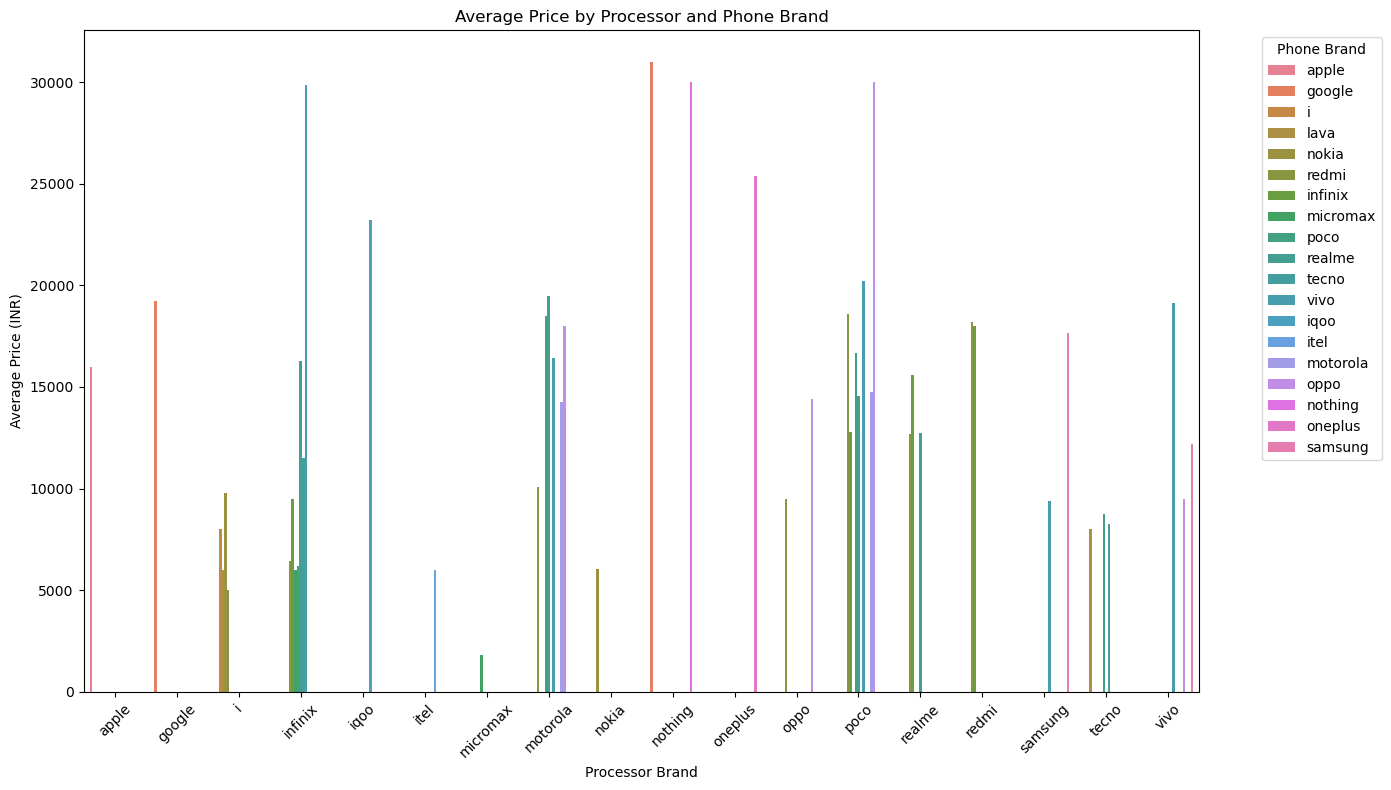

In [107]:
grouped = df.groupby(['Processor Brand', 'Brand'])['Prize'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='Processor Brand', y='Prize', hue='Brand')
plt.title('Average Price by Processor and Phone Brand')
plt.xlabel('Processor Brand')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.legend(title='Phone Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###  Premium Phone Brands:
###  Apple, Google, OnePlus, and Nothing stand out with consistently high average prices across the board.
###  These brands target the premium market segment, reflected in prices above ₹25,000–₹30,000.
###  Mid-Range to Upper Mid-Range Brands:
### Samsung, Oppo, Vivo, iQOO, Realme, Poco have a broad price distribution, suggesting they offer models from mid-range to near-premium.
### This strategy caters to a wider audience, combining affordability with some high-end features.
### Budget Segment Brands:
### Lava, Infinix, Itel, Micromax, Tecno, Nokia show low average prices, mostly under ₹10,000–₹12,000.
### These brands primarily target price-sensitive consumers or first-time smartphone users.

## Now we will perform Label Encoding for categorical columns to make it more understandable for machine learning

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Important libraries imported for encoding

In [109]:
label_encoder = LabelEncoder()
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df.head()

,Memory,RAM,Battery_,Mobile Height,Base_Color,Brand,Processor Brand,Camera_Category,Prize
0,64.0,4,5000.0,16.76,Black,3,infinix,Medium,7299.0
1,64.0,4,5000.0,16.76,Blue,3,infinix,Medium,7299.0
2,128.0,8,5000.0,16.64,Gray,8,motorola,High,11999.0
3,32.0,2,5000.0,16.56,Blue,13,infinix,Medium,5649.0
4,128.0,8,5000.0,16.76,Marigold,3,infinix,High,8999.0


In [110]:
label_encoder = LabelEncoder()
df['Base_Color'] = label_encoder.fit_transform(df['Base_Color'])
df.head()

,Memory,RAM,Battery_,Mobile Height,Base_Color,Brand,Processor Brand,Camera_Category,Prize
0,64.0,4,5000.0,16.76,3,3,infinix,Medium,7299.0
1,64.0,4,5000.0,16.76,5,3,infinix,Medium,7299.0
2,128.0,8,5000.0,16.64,24,8,motorola,High,11999.0
3,32.0,2,5000.0,16.56,5,13,infinix,Medium,5649.0
4,128.0,8,5000.0,16.76,34,3,infinix,High,8999.0


In [111]:
label_encoder = LabelEncoder()
df['Processor Brand'] = label_encoder.fit_transform(df['Processor Brand'])
df.head()

,Memory,RAM,Battery_,Mobile Height,Base_Color,Brand,Processor Brand,Camera_Category,Prize
0,64.0,4,5000.0,16.76,3,3,3,Medium,7299.0
1,64.0,4,5000.0,16.76,5,3,3,Medium,7299.0
2,128.0,8,5000.0,16.64,24,8,7,High,11999.0
3,32.0,2,5000.0,16.56,5,13,3,Medium,5649.0
4,128.0,8,5000.0,16.76,34,3,3,High,8999.0


In [112]:
label_encoder = LabelEncoder()
df['Camera_Category'] = label_encoder.fit_transform(df['Camera_Category'])
df.head()

,Memory,RAM,Battery_,Mobile Height,Base_Color,Brand,Processor Brand,Camera_Category,Prize
0,64.0,4,5000.0,16.76,3,3,3,2,7299.0
1,64.0,4,5000.0,16.76,5,3,3,2,7299.0
2,128.0,8,5000.0,16.64,24,8,7,0,11999.0
3,32.0,2,5000.0,16.56,5,13,3,2,5649.0
4,128.0,8,5000.0,16.76,34,3,3,0,8999.0


### Model Preparation

### As we are predicting mobile price so this problem will be taken under supervised learning problem and regression will be used

### First we will import important libraries used for building model and evaluation of model(Mean absolute error and root mean squared error)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

### For preparation for model we need to split our data into training and testing

In [114]:
X = df.drop('Prize', axis=1)
y = df['Prize']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Random Forest Regressor

In [115]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [116]:
y_pred = model.predict(X_test)

In [117]:
y_pred

array([ 8688.        ,  6548.62      , 20923.02380952, 10931.5       ,
       14298.41333333, 14254.83333333, 10334.20833333, 15869.60466667,
       23739.87533333,  8466.96666667, 10154.        , 20772.76533333,
       20583.36      , 17361.81      , 26361.76      , 15875.45416667,
       10429.        , 20705.16666667, 22786.38333333, 21779.25      ,
        6820.2       , 18803.53666667, 10907.785     , 17826.14666667,
       27769.17      , 16590.66666667,  7041.87333333, 21704.14      ,
        9699.06333333,  8536.41      , 19138.12166667, 19024.38566667,
        1343.2       , 16448.62      , 24807.99833333, 15379.91      ,
       12157.49642857, 21001.16666667, 15757.779     ,  9639.05      ,
       13709.        , 20926.94333333, 22559.38619048, 11727.24833333,
        6059.67      , 19224.76      , 17216.72      , 10995.385     ,
        9630.325     ,  6613.88666667, 15821.27      , 25724.96142857,
        8200.35      , 11320.65333333,  8616.3475    , 16029.9       ,
      

In [125]:
print(len(X_test), len(y_pred))

109 109


In [135]:
(y_pred).max

<function ndarray.max>

### Evaluating The Model

In [134]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: ₹{mae:.2f}")
print(f"RMSE: ₹{rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: ₹1762.70
RMSE: ₹2731.06
R² Score: 0.84


C:\Users\Advita\anaconda3_new\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### "Across all phones in the test set, the model's predicted price was, on average, ₹1762.70 different from the
###  actual price — sometimes higher, sometimes lower."



### RMSE is very high(2731.06 )(There are some large outliers or higher variance in predictions.)

### Ranges from 0 to 1 (1 = perfect prediction),in our case it is 0.84 which is considered as fair. 

### Good model overall.
### High RMSE indicates some errors are much larger than others (possibly due to outliers or skew).
### Improve our model further by using
### Hyperparameter tuning (e.g. GridSearchCV)



##  2)Preparing another Model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

### model's evaluation results suggest it's not performing well. Here’s what the metrics indicate:
### - High MSE and RMSE: A large error means predictions are significantly off from actual values.
### - Negative R² Score: This suggests the model is worse.


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: ₹{mae:.2f}")
print(f"RMSE: ₹{rmse:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:
y_pred

### Model seems to be performing fairly well! Here’s a quick interpretation of the metrics:
### - Mean Absolute Error (MAE): ₹2498.56 → On average, the model's predictions are off by ₹2498.56.
### - Root Mean Squared Error (RMSE): ₹3422.78 → Larger errors are penalized more, making this a good indicator of overall accuracy.
### - R² Score: 0.75 → The model explains 75% of the variance in the target variable, which is a decent fit.
###  Since RMSE is noticeably higher than MAE, it suggests that some predictions have larger errors. we can consider
### - Hyperparameter tuning for optimization.


# Random Forest Regressor

In [138]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [139]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1762.6993984272601
Root Mean Squared Error (RMSE): 2731.06082962894
R² Score: 0.8432129741311364


### - Mean Absolute Error (MAE): ~1589.27
### - On average, the predictions deviate by ₹1589 from the actual price.
### - Root Mean Squared Error (RMSE): ~3492.76
### - This penalizes larger errors more significantly, indicating that some predictions have substantial deviations.
### - R² Score: 0.74
### - This means the model explains 74% of the variance in mobile phone prices, which is a decent fit, but there is room for improvement.
### Key Insights:
### Model is reasonably good at predicting prices, but it could be improved.
### The high RMSE suggests that some price predictions may be off by a large margin.

# We can perform hyperparameter tuning to improve this

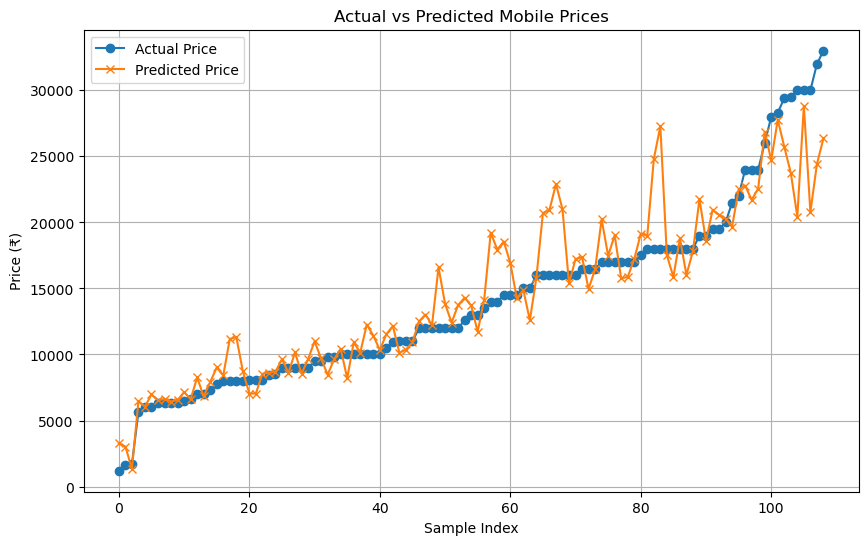

In [140]:
import matplotlib.pyplot as plt

# Sort by actual prices for a clearer plot (optional)
sorted_indices = y_test.argsort()
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Price', marker='o')
plt.plot(y_pred_sorted, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Mobile Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.show()


In [137]:
y_pred

array([ 8688.        ,  6548.62      , 20923.02380952, 10931.5       ,
       14298.41333333, 14254.83333333, 10334.20833333, 15869.60466667,
       23739.87533333,  8466.96666667, 10154.        , 20772.76533333,
       20583.36      , 17361.81      , 26361.76      , 15875.45416667,
       10429.        , 20705.16666667, 22786.38333333, 21779.25      ,
        6820.2       , 18803.53666667, 10907.785     , 17826.14666667,
       27769.17      , 16590.66666667,  7041.87333333, 21704.14      ,
        9699.06333333,  8536.41      , 19138.12166667, 19024.38566667,
        1343.2       , 16448.62      , 24807.99833333, 15379.91      ,
       12157.49642857, 21001.16666667, 15757.779     ,  9639.05      ,
       13709.        , 20926.94333333, 22559.38619048, 11727.24833333,
        6059.67      , 19224.76      , 17216.72      , 10995.385     ,
        9630.325     ,  6613.88666667, 15821.27      , 25724.96142857,
        8200.35      , 11320.65333333,  8616.3475    , 16029.9       ,
      

In [ ]:
# Get feature importance
importance = rf_model.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

### Recommendations according to random forest regressor model
### Based on feature importance, we can provide key insights:
### - RAM, Memory, and Mobile Height likely have the highest impact on pricing.
### - Camera specifications (Rear and Front)  and brand may also be significant but secondary.
### - processor brand, Battery and Base color may have minimal impact and could be excluded from a leaner model.


### Recommendations Based on Feature Importance Analysis
### After evaluating the feature importance from the Random Forest model, we can determine which features play the most 
### significant role in predicting mobile phone prices. These insights can help the organization refine pricing strategies and marketing decisions.
### Key Features Influencing Mobile Phone Prices
### From the feature importance analysis, the most critical factors impacting price are: 

### 1)Memory– Models with higher internal storage tend to have higher demand.
### 2)RAM – Higher RAM models tend to be priced significantly higher. Increasing RAM options could cater to performance-focused users.
### 3)Mobile Height – surprisingly mobile height tend to have big impact.

### Marketing & Pricing Strategy
### Segmented Pricing Strategy:
### - Offer premium pricing tiers based on RAM, Camera, Battery, and Processor quality.
### - Introduce budget-friendly versions of popular models by lowering storage and processor specifications.
### Marketing Focus on High-Impact Features:
### Highlight camera quality, RAM size, and processor brand in advertisements.
### Battery life should be emphasized, as it ranks among key decision factors for customers.

# Competitor Benchmarking:
### - Compare similar price-tier phones from competing brands.
### Ensure the pricing aligns with customer expectations based on feature offerings.
### Product Bundling Recommendations:
### - Phones with higher RAM & storage can be marketed alongside complementary offers (cloud storage, accessories).
### - Camera-focused devices could target photography enthusiasts and influencers. 